<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Anastasia!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-info">
<b>Student сomments:</b>
    
Alexander, hi!
    
    
Thank you for your review!
I hope I have corrected everything you wrote.
</div>


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Anastasia. I glad to see you :)

# Exploring and Cleaning Data with Pandas

# Contents <a id='back'></a>


* [Introduction](#intro)
* [Data overview](#data_review)



* [Duplicates](#duplicates)
    * [Duplicates in `orders`](#duplicates_in_order)
    * [Duplicates in `products`](#duplicates_in_products)
    * [Duplicates in `departments`](#duplicates_in_departments)
    * [Duplicates in `aisles`](#duplicates_in_aisles)
    * [Duplicates in `order products`](#duplicates_in_order_products)
* [Missing values](#missing_values)
    * [Missing values in `products`](#missing_values_in_products)
    * [Missing values in `orders`](#missing_values_in_orders)
    * [Missing values in `order products`](#missing_values_in_order_products)
* [Analysis](#analysis)
    * [Part A](#part_a)
    * [Part B](#part_b)
    * [Part C](#part_c)
* [Overall conclusion](#end)

## Introduction <a id='intro'></a>

In this project we will look at the Instacart order database.

Goals:

Perform 3 parts of the analysis suggested by the program.

[A] Easy (must complete all to pass)
* Verify that values in the 'order_hour_of_day' and 'order_dow' columns in the orders table are sensible (i.e. 'order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6).
* Create a plot that shows how many people place orders for each hour of the day.
* Create a plot that shows what day of the week people shop for groceries.
* Create a plot that shows how long people wait until placing their next order, and comment on the minimum and maximum values.

[B] Medium (must complete all to pass)
* Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays? Plot the histograms for both days on the same plot and describe the differences that you see.
* Plot the distribution for the number of orders that customers place (e.g. how many customers placed only 1 order, how many placed only 2, how many only 3, and so on…)
* What are the top 20 products that are ordered most frequently (display their id and name)?

[C] Hard (must complete at least two to pass)
* How many items do people typically buy in one order? What does the distribution look like?
* What are the top 20 items that are reordered most frequently (display their names and product IDs)?
* For each product, what proportion of its orders are reorders (create a table with columns for the product ID, product name, and reorder proportion)?
* For each customer, what proportion of their products ordered are reorders?
* What are the top 20 items that people put in their carts first (display the product IDs, product names, and number of times they were the first item added to the cart)?

Stages:
1. Data overview
2. Removing duplicates
3. Processing and analysis of missing values
4. Exploratoring data and plotting graphs to identify patterns
5. Overall conclusion

[Back to Contents](#back)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

<div class="alert alert-info">
<b>Student сomments:</b>
    
To be honest, I don’t quite understand my goal in this project) More precisely, my goal is to improve my data analysis skills. And I am asked to perform specific actions. At the same time, it is not entirely clear to me for what exact result they are asking for this. If it were clear to me, I would try to formulate my goals differently)
</div>

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №2__

please see an example
    
For this project, you’ll work with data from Instacart.

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

Your mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.

</div>

## Stage 1. Data overview
<a id='data_review'></a>

First, let's import the pandas and matplotlib libraries for data processing.

In [1]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt

Next, let's read given files.

In [2]:
#read files
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

And let's look at them more closely.

In [3]:
#look at orders and info about it
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
#look at products and info about it
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
#look at aisles and info about it
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [9]:
#look at departments and info about it
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [11]:
#look at order_products and info about it
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [12]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


There are a few questions about column types, as well as some missing data.
Let's try to deal with these questions in order.

[Back to Contents](#back)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__


Great. First look at the data is done

## Find and remove duplicate values (and describe why you make your choices)
<a id='duplicates'></a>

Let's check if each of our tables contain duplicates.

### `orders` data frame
<a id='duplicates_in_order'></a>

In [13]:
# Check for duplicated orders
orders.duplicated().sum()

15

In [14]:
# Check for all orders placed Wednesday at 2:00 AM

orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Look, all the duplicate orders happened at 2am on Wednesday.
This looks like a system error.
Let's just delete them.

In [15]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [16]:
# Double check for duplicate rows
orders.duplicated().sum()

0

In [17]:
# Double check for duplicate order IDs only
orders['order_id'].duplicated().sum()

0

Well, there are no more duplicates left.
In addition, there are no duplicate values left in the order_id column.

[Back to Contents](#back)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great

### `products` data frame
<a id='duplicates_in_products'></a>

In [18]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [19]:
# Check for just duplicate product IDs
products['product_id'].duplicated().sum()

0

In [20]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()

1361

In [21]:
# Check for duplicate product names that aren't missing
product_names = products[~products['product_name'].isna()]['product_name']
print('Number of duplicates, case sensitive:', product_names.duplicated().sum())
print('Number of duplicates, case insensitive:', product_names.str.lower().duplicated().sum())

Number of duplicates, case sensitive: 0
Number of duplicates, case insensitive: 104


It turns out that all the duplicates are:
* empty values (we'll deal with them later),
* the same names, written differently.

Actually, it would be great to merge duplicates of the second type. But we cannot do this, since there is not enough data to correctly change the data in order_products.
So we'll leave these duplicates unchanged.

[Back to Contents](#back)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right, well done!)

### `departments` data frame
<a id='duplicates_in_departments'></a>

In [22]:
# Check for fully duplicate rows
departments.duplicated().sum()

0

In [23]:
# Check for just duplicate departments names (with converting them to lowercase)
departments['department'].str.lower().duplicated().sum()

0

Great! There are no explicit or implicit duplicates here!

[Back to Contents](#back)

### `aisles` data frame
<a id='duplicates_in_aisles'></a>

In [24]:
# Check for fully duplicate rows
aisles.duplicated().sum()

0

In [25]:
# Check for just aisle departments names (with converting them to lowercase)
aisles['aisle'].str.lower().duplicated().sum()

0

Great! There are no explicit or implicit duplicates here!

[Back to Contents](#back)

### `order_products` data frame
<a id='duplicates_in_order_products'></a>

In [26]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [27]:
# Double check for any other tricky duplicates

order_products[['order_id', 'product_id']].duplicated().sum()

0

Great! There are no explicit or implicit duplicates here!

[Back to Contents](#back)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

all right

## Find and remove missing values
<a id='missing_values'></a>

Now let's take a closer look at the missing values and try to figure out what we can do with them.

As we remember, there were missing values in only three files. Let's look at them one by one.

### `products` data frame
<a id='missing_values_in_products'></a>

In [28]:
# Check for missing values in all dataframe
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [29]:
# Are all of the missing product names associated with aisle ID 100?
print(products[products['product_name'].isna()]['aisle_id'].unique())

[100]


In [30]:
# Are all of the missing product names associated with department ID 21?
print(products[products['product_name'].isna()]['department_id'].unique())

[21]


In [31]:
# What is this ailse and department?
aisles[aisles['aisle_id'] == 21]['aisle']

20    packaged cheese
Name: aisle, dtype: object

In [32]:
# Fill missing product names with 'Unknown'
departments[departments['department_id'] == 21]['department']

20    missing
Name: department, dtype: object

In [33]:
# products[products['product_name'].isna()].sample(30)
products['department_id'].value_counts()

11    6564
19    6264
13    5372
7     4366
1     4008
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1117
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: department_id, dtype: int64

All missing values are aisle `packaged cheese`. Let's also replace the missing values with `packaged cheese`.

In [34]:
products['product_name'] = products['product_name'].fillna('packaged cheese')
products['product_name'].isna().sum()

0

[Back to Contents](#back)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You chose the most correct way to replace the omissions in the categorical column. Well done!)

### `orders` data frame
<a id='missing_values_in_orders'></a>

In [35]:
# Check for missing values in all dataframe
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [36]:
# Are there any missing values where it's not a customer's first order?
orders[orders['order_number'] != 1]['days_since_prior_order'].isna().sum()

0

As you can see, missing values in this table really mean no value.
If a person has made only one order, the number of days until the next one is uncertain.

Let's leave the values empty.

[Back to Contents](#back)

### `order_products` data frame
<a id='missing_values_in_order_products'></a>

In [37]:
# Check for missing values in all dataframe
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [38]:
# What are the min and max values in this column?
print('Min values in order_products[\'add_to_cart_order\'] is', order_products.add_to_cart_order.min())
print('Min values in order_products[\'add_to_cart_order\'] is', order_products.add_to_cart_order.max())

Min values in order_products['add_to_cart_order'] is 1.0
Min values in order_products['add_to_cart_order'] is 64.0


In [39]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
orders_with_missing_value = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [40]:
# Do all orders with missing values have more than 64 products?
grouped_orders = order_products[order_products['order_id'].isin(orders_with_missing_value)].groupby('order_id')
count_of_products = grouped_orders['order_id'].count()
count_of_products.unique()

array([ 65, 127,  95,  69,  70, 104,  66,  91,  77,  76,  85,  67,  74,
        87,  73,  75,  72,  68,  78,  86,  92,  98,  80, 108,  71, 115])

In [41]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

Apparently, the empty values here are related to the space that was allocated in the system to record the number in `add_to_cart_order`.
Well, we won’t be able to find out in what order the products were added to the cart. But at least this column is now in integer format.

[Back to Contents](#back)

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Replacing it with 999/-1 etc is not really good. Tip for the future, look, it's not good to try to fill in the blanks left and right. In real work - replace with zero now, then forget and average count a month later. Plus there may be times when a bonus purchase or gift, will cost zero. In general, if it is possible to leave skips as skips - and here it can be done, it is better to do so, the results, even if we want to calculate something - it will not affect the results

It is better to use this code construction:
    
    data[''] = data[''].astype('Int64', errors='ignore')
</div>

<div class="alert alert-info">
<b>Student сomments:</b>

This replacement seems strange to me, but it was suggested in the code comments when I started the project. Therefore, I decided that this was a mandatory recommendation, and did as suggested.


I agree that skips could have been left for this analysis. As far as I understand, the replacement was needed only to change the data type.

</div>


<div class="alert alert-info">
<b>Student сomments:</b>
    
Regarding the method you suggest.
Below I have provided code examples.
If I try it on a simple dataframe, everything works.
But if I try to apply it on a given table, the column type does not change. I tried a similar action with data from a previous project and had the same problem: the data type did not change. In that case, I had to change the data type manually, through a loop, since it was important for visualization.
Here I used the suggested replacement (999).
</div>

In [42]:
#Here the data type does not change
order_products_test = pd.read_csv('/datasets/order_products.csv', sep=';')

order_products_test.info()
print()

order_products_test['add_to_cart_order'] = order_products_test['add_to_cart_order'].astype(int, errors='ignore')


order_products_test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [43]:
#And here it changes. Although I don't see much difference!
df = pd.DataFrame([[1, 1], [2, None], [3, 3.0]])
print(df)
df.info()

print()
df[1] = df[1].astype('Int64', errors='ignore')
print(df)
df.info()

   0    1
0  1  1.0
1  2  NaN
2  3  3.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3 non-null      int64  
 1   1       2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes

   0     1
0  1     1
1  2  <NA>
2  3     3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3 non-null      int64
 1   1       2 non-null      Int64
dtypes: Int64(1), int64(1)
memory usage: 179.0 bytes


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Correct

## Analisis
<a id='analysis'></a>

# [A] Easy (must complete all to pass)
<a id='part_a'></a>

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [44]:
print(sorted(orders['order_hour_of_day'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [45]:
print(sorted(orders['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]


Yes, the values are correct.

[Back to Contents](#back)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

### [A2] What time of day do people shop for groceries?

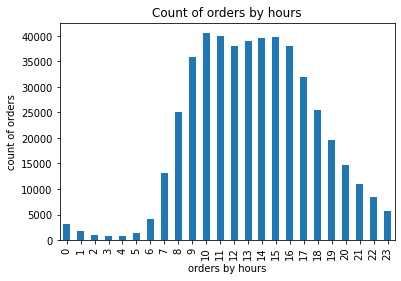

In [46]:
time_of_orders = orders[['order_id', 'order_hour_of_day']].groupby('order_hour_of_day')['order_id']
time_of_orders.count().plot(x='order_hour_of_day',
                            kind='bar',
                            xlabel='orders by hours',
                            ylabel='count of orders',
                            title='Count of orders by hours')
plt.show()

It seems that people place most of their orders during the working day. And the decline in activity around noon looks like a lunch break.

[Back to Contents](#back)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You're right to sign the charts

### [A3] What day of the week do people shop for groceries?

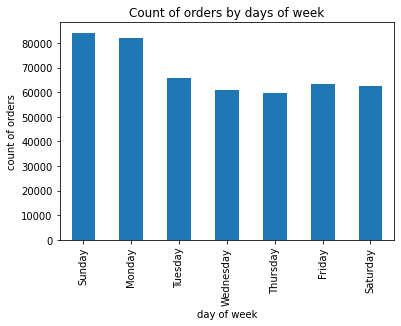

In [47]:
time_of_orders = orders[['order_id', 'order_dow']].groupby('order_dow')['order_id']

days_of_order = time_of_orders.count()
days_of_order.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

days_of_order.plot(x='order_dow',
                   kind='bar',
                   xlabel='day of week',
                   ylabel='count of orders',
                   title='Count of orders by days of week')

plt.show()


From questions about missing values in the `orders` file, we know that Wednesday is day 3, based on this we determined the other days.

It looks like Sunday and Monday are the peak times for activity.

People are probably shopping for groceries before starting a new week, returning home after the weekend.

[Back to Contents](#back)

### [A4] How long do people wait until placing another order?

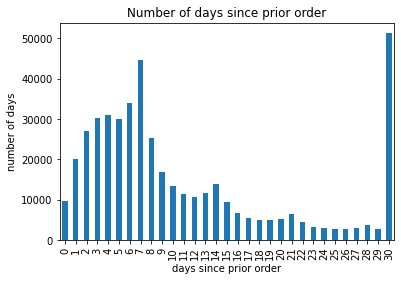

In [48]:
time_of_orders = orders[['order_id', 'days_since_prior_order']].groupby('days_since_prior_order')['order_id']
since_prior_order = time_of_orders.count().reset_index(drop=True)

since_prior_order.plot(x='days_since_prior_order',
                       kind='bar',
                       xlabel='days since prior order',
                       ylabel='number of days',
                       title='Number of days since prior order')
plt.show()

And finally, the frequency of repeat orders.

Most often, repeat orders occur within a week.
Peak — orders once every 7 or 30 days.

7 days — weekly grocery purchases.

30 days — purchases for a month or maybe immediately after salary.

The minimum value (0 days) is most likely due to the fact that a person forgets to buy something important and immediately places another order.

[Back to Contents](#back)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

The 0 values probably correspond to customers who placed more than one order on the same day.

# [B] Medium (must complete all to pass)
<a id='part_b'></a>

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

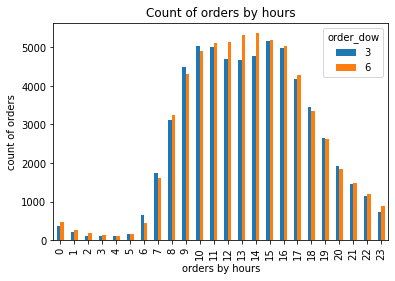

In [49]:
ws_orders = orders[(orders['order_dow'] == 3) | (orders['order_dow'] == 6)]
pivot_data = ws_orders.pivot_table(index='order_hour_of_day',
                                   columns='order_dow',
                                   values='order_id',
                                   aggfunc='count')

pivot_data.plot(kind='bar',
                xlabel='orders by hours',
                ylabel='count of orders',
                title='Count of orders by hours')
plt.show()

Judging by this chart, people wake up a little later on the weekend. Plus, everyone eats lunch at different times, so there's no midday drop in orders on Saturday.
But before and after the “family dinner” (6-8 pm) on Saturday, people place a little more orders.

[Back to Contents](#back)

### [B2] What's the distribution for the number of orders per customer?

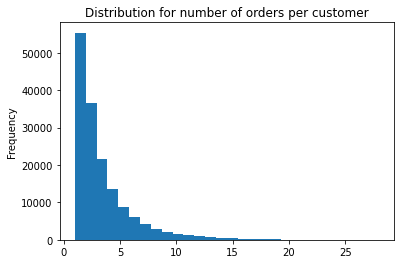

In [50]:
orders_by_users = orders['user_id'].value_counts()

orders_by_users.plot(kind='hist',
                     bins=28,
                     title='Distribution for number of orders per customer')

plt.show()

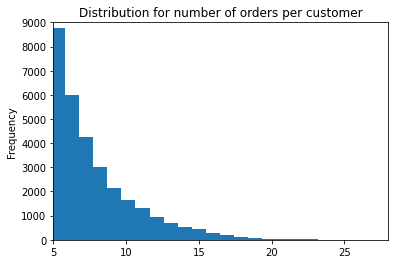

In [51]:
# a closer look at distribution for people with >5 orders
orders_by_users.plot(kind='hist',
                     bins=28,
                     xlim=[5, 28],
                     ylim=[0, 9000],
                     title='Distribution for number of orders per customer')
plt.show()

Most people make no more than 5 orders.

At the same time, no one made more than 30 orders, that is, the store does not have a large number of regular customers.

But at the same time, there are tens of thousands of customers who have made more than 5 orders.

[Back to Contents](#back)

### [B3] What are the top 20 popular products (display their id and name)?

In [52]:
products_in_orders = order_products['product_id'].value_counts()
products_in_orders = products_in_orders.reset_index()
top_20_products = products_in_orders.loc[0:19].rename(columns={'index': 'product_id', 'product_id': 'count_of_orders'})
top_20_products

product_names = products[['product_id', 'product_name']]

top_20_products = top_20_products.merge(product_names, on='product_id', how='left')
top_20_products

,product_id,count_of_orders,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


Here are the top 20 products that people buy on Instagram.

Well, everyone loves bananas)
And vegetables, okay.

[Back to Contents](#back)

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

This data needs to be visualized. Add please

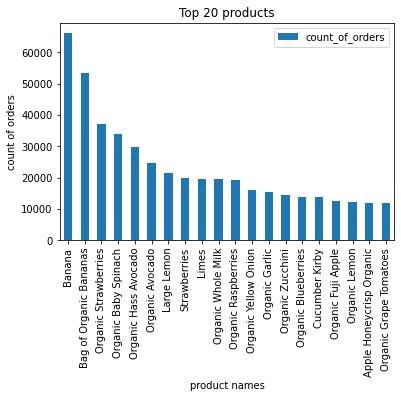

In [53]:
top_20_products.plot(kind='bar',
                     x='product_name',
                     y='count_of_orders',
                     xlabel='product names',
                     ylabel='count of orders',
                     title='Top 20 products')
plt.show()

<div class="alert alert-info">
<b>Student сomments:</b>
    
I've added a visualization above!
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Great visualization

# [C] Hard (must complete at least two to pass)
<a id='part_c'></a>

### [C1] How many items do people typically buy in one order? What does the distribution look like?

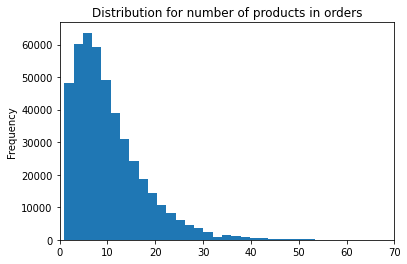

In [54]:
grouped_orders = order_products.groupby('order_id')
count_of_products = grouped_orders['product_id'].count()
count_of_products
count_of_products.plot(kind='hist',
                       bins=65,
                       xlim=[0, 70],
                       title='Distribution for number of products in orders')
plt.show()

As you can see, people usually don't order very many products at once.
But still usually more than one product.

But orders with a large number of products (more than 30, for example) are extremely rare.

[Back to Contents](#back)

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [55]:
#products_in_orders = order_products['product_id'].value_counts()
reorders = order_products.groupby('product_id')['reordered'].sum()
reorders = reorders.reset_index().rename(columns={'reordered': 'count_of_reorders'})
reorders = reorders.sort_values(by='count_of_reorders', ascending=False)
reorders
top_20_reordered_products = reorders.iloc[0:20].reset_index(drop=True)
top_20_reordered_products

product_names = products[['product_id', 'product_name']]

top_20_reordered_products.merge(product_names, on='product_id', how='left')

,product_id,count_of_reorders,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


Well, the top most reordered products are very similar to the list of most popular products.

And this is quite logical)

[Back to Contents](#back)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct

### [C3] For each product, what proportion of its orders are reorders?

In [56]:
product_grp = order_products.groupby('product_id')
agg_dict = {'product_id': 'count', 'reordered': 'sum'}
reorders = product_grp.agg(agg_dict)
reorders = reorders.rename(columns={'product_id': 'count_of_orders', 'reordered': 'count_of_reorders'})

reorders['share_of_reorders'] = reorders['count_of_reorders']/reorders['count_of_orders']
share_of_reorders = reorders['share_of_reorders']
share_of_reorders = share_of_reorders.reset_index()

product_names = products[['product_id', 'product_name']]

share_of_reorders = share_of_reorders.merge(product_names, on='product_id')
share_of_reorders

,product_id,share_of_reorders,product_name
0,1,0.564286,Chocolate Sandwich Cookies
1,2,0.000000,All-Seasons Salt
2,3,0.738095,Robust Golden Unsweetened Oolong Tea
3,4,0.510204,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,7,0.500000,Pure Coconut Water With Orange
...,...,...,...
45568,49690,0.800000,HIGH PERFORMANCE ENERGY DRINK
45569,49691,0.430556,ORIGINAL PANCAKE & WAFFLE MIX
45570,49692,0.416667,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
45571,49693,0.440000,SPRING WATER BODY WASH


Cool! Now we know how often products are reordered.

[Back to Contents](#back)

### [C4] For each customer, what proportion of their products ordered are reorders?

In [57]:
#157437 users

users_for_orders = orders[['order_id', 'user_id']]

order_products_with_users = order_products.merge(users_for_orders, on='order_id')

products_by_users = order_products_with_users.groupby('user_id')

agg_dict = {'user_id': 'count', 'reordered': 'sum'}
reorders_by_users = products_by_users.agg(agg_dict)
reorders_by_users = reorders_by_users.rename(columns={'user_id': 'count_of_ordered_products', 'reordered': 'count_of_reorders'})

share_of_reorders_by_users = reorders_by_users['count_of_reorders']/reorders_by_users['count_of_ordered_products']

share_of_reorders_by_users = share_of_reorders_by_users.rename('share_of_reorders_by_users')
share_of_reorders_by_users = share_of_reorders_by_users.reset_index()
share_of_reorders_by_users


,user_id,share_of_reorders_by_users
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571
...,...,...
149621,206203,0.222222
149622,206206,0.714286
149623,206207,0.891304
149624,206208,0.696000


Great!
Now we can find out how often people order something they've already tried.

[Back to Contents](#back)

### [C5] What are the top 20 items that people put in their carts first? 

In [58]:
first_ordered = order_products[order_products['add_to_cart_order'] == 1]
top_20_first_products = first_ordered['product_id'].value_counts()[0:20]
top_20_first_products = top_20_first_products.reset_index()
top_20_first_products = top_20_first_products.rename(columns={'index': 'product_id',
                                                              'product_id': 'count_of_orders'})

product_names = products[['product_id', 'product_name']]
top_20_first_products = top_20_first_products.merge(product_names, on='product_id')
top_20_first_products

# product IDs, product names, and number of times they were the first item added

,product_id,count_of_orders,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


Well, the latter is quite logical: products that are most often reordered are most often added to the cart first.

People love predictability)

[Back to Contents](#back)

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

This data needs to be visualized. Add please

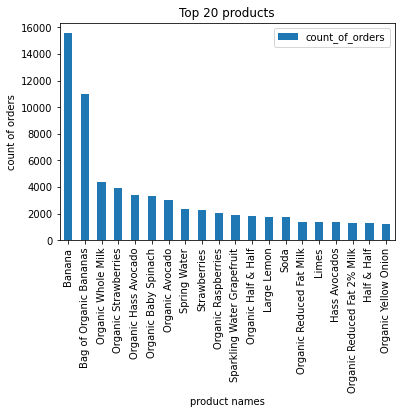

In [59]:
top_20_first_products.plot(kind='bar',
                     x='product_name',
                     y='count_of_orders',
                     xlabel='product names',
                     ylabel='count of orders',
                     title='Top 20 products')
plt.show()

<div class="alert alert-info">
<b>Student сomments:</b>
    
I've added a visualization above!
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

All right

## Overall conclusion
<a id='end'></a>

We have analyzed the Instacart order database.
After processing the data, visualizations were built, based on which the following conclusions can be drawn:
* People place most of their orders during the working day. On weekends, activity hours shift slightly, but not significantly.
* The top days for the number of orders are Sunday and Monday.
* Often people's orders have some pattern (for example, purchasing products after 7 days).
* Most customers made only a few (<5) orders.
* One order usually does not contain very many types of products (almost always less than 30).

The Top 20 most ordered products and the Top 20 most reordered products were also determined.  
And also the Top 20 products that people buy first.  
These lists are quite similar.

For each product, the share of reorders was determined.
And for each client — the share of orders that he reorders.

[Back to Contents](#back)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Good for you for writing the final conclusion

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊